<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/physics/physics_significant_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Imports {display-mode: "form"}
import sys
import os
import platform
import random
import itertools
import math
import datetime

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# reading google sheets files
import gspread
from oauth2client.client import GoogleCredentials

from collections import OrderedDict
from typing import List, Optional

# print versions
print (f"system: {sys.version}")
print (f"pandas: {pd.__version__}")
print (f"numpy: {np.__version__}")

system: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas: 1.1.5
numpy: 1.19.5


In [4]:
# @title Dislay settings  {display-mode: "form"} 
sns.set(context='notebook', style="whitegrid", rc={"figure.figsize": (20, 10)})
pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", 200)

In [7]:
# @title Generate Report header with meta information {display-mode: "form"} 
def generate_header(author: Optional[str] = 'szczecinski',
                    title: Optional[str] = 'unknown',
                    description: Optional[str] = 'unknown',
                    prepared_for: Optional[str] = 'learning',
                    tags: Optional[List[str]] = [''],
                    links: Optional[List[str]] = ['']):
    """
    Generates standardised header with meta information describing the report.
    
    Args:
      author: Name of the author.
      title: Title of the report.
      description: Text describing the report.
      prepared_for: Text providing context and purpose of generating the report.
      tags: List of tags for searching.
      links: List of links for reference and cross linking.

    Returns:
      df_meta: Formatted Pandas Dataframe with meta information of the report.
    """
    meta_dict = OrderedDict()

    # Properties provided by author.
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)
    meta_dict['links'] = str(links)

    # Properties auto generated by the system.
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['report_information']).T
    return df_meta

In [10]:
# @title {display-mode: "form"} 
# setting up header info
author = 'Michal Szczecinski'
prepared_for ='learning'
title = 'Significant figures'
description = 'Demonstration of concept of significant figures with the examples from physics.'
tags = ['#data-driven', '#math', '#physics']
links = ['']

# Significant figures

Calculators usually give us many digits in an answer. How do we decide how many digits to write down for the final answer?

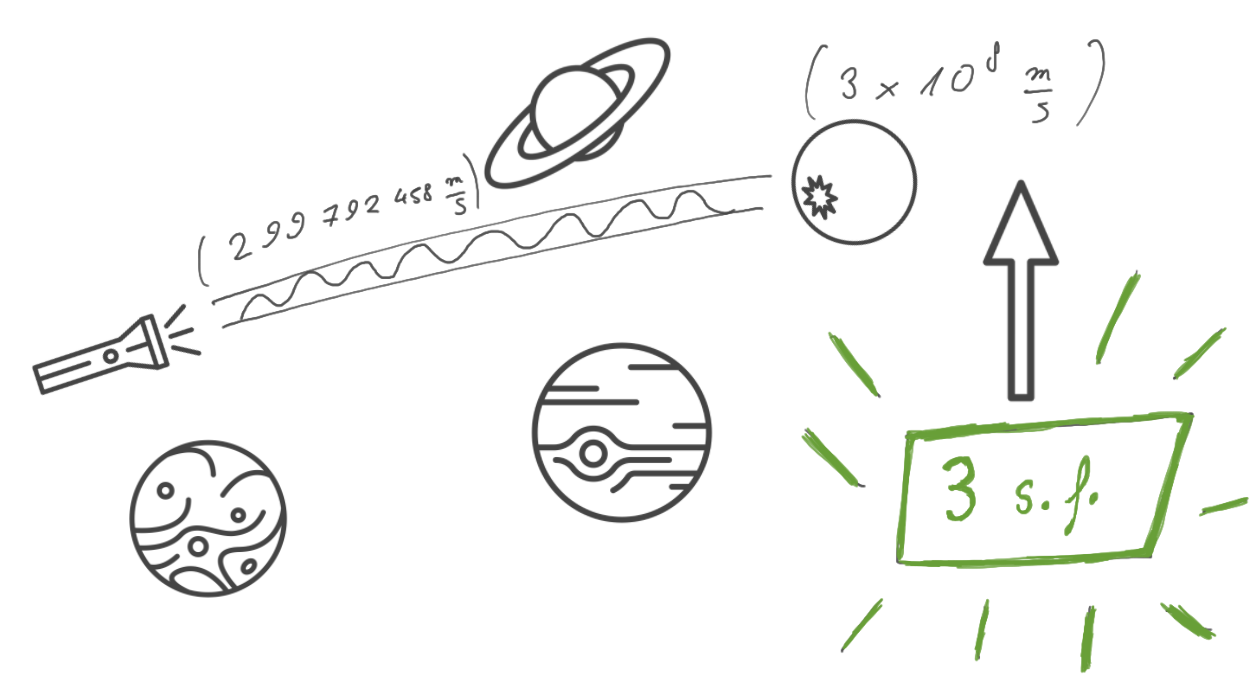

In [9]:
generate_header(author=author,
                title=title,
                description=description,
                prepared_for=prepared_for,
                tags=tags,
                links=links)

,report_information
author,Michal Szczecinski
title,Significant figures
description,Demonstration of concept of significant figures with the examples from physics.
prepared_for,learning
tags,"['#data-driven', '#math', '#physics']"
links,['']
runtime,2021-10-10 13:51:45
path,/content
python_version,3.7.12
pandas_version,1.1.5


- Scientists use a method of rounding to a certain number of `significant figures`.
- "Significant" here means **meaningful**.
- `Significant figures` are often abbreviated to `s.f.`

## Examples (basic demonstration)

1. **84072**
  - **8** is the most significant digit because it tells us that the number is **80 thousand** plus "something"
  - **4** is the next most significant digit, telling us that there are also **4 thousand** and something.    
2. **0.002451**
  - **2** is the most significant digit because it tells us the number is 2 thousandths and something.
  - **4** is next most significant digit because it tells us there are also 4 **ten thousandths** and something.
  - if we wish to express this number to two significant figures we would round it up to 0.0025
  - note: when we have a number like 0.00245, the digit after 4 is 5 so we would have equal justification (since 5 is in the middle) to round it either:
  
    a) down to to 0.0024 or  
    b) up to 0.0025. 

## Examples (with scientific notation)

1. **Speed of light: 299 792 458 m/s**
  - rounded to 3 significant digits: 300 000 000 m/d
  - in scientific notation: $3 x 10^{8}$ (to 3 s.f.)
2. **Mass of the Sun: 1,988,500 x $10^{24}$ kg** [2]
  - to four significant figures: 1 989 000 000 000 000 000 000 000 000 000 (that is 1989 and twenty-seven zeros)
  - to convert to scientific notation we write it as 1.989 (we imagine that we move the decimal point 30 places to the left, from 1989...000.0...)
  - this brings our number to original number and we can write it as $1.989 x 10^{30}$
3. **Charge on the electron: 0.000 000 000 000 000 000 1602 coulombs**
  - we write coefficient as 1.602 (we move the decimal point 19 places to the right, 18 zeros plus one time after 1) 
  - and we write number as $1.602 x 10^{-19}$
  - coefficient 1.602; base 10; exponent -19

## Rules for using significant figures

1. A digit that is not zero will always be significant (e.g. 345 is 3 s.f.).
2. Zeros that occur sandwiched between non-zero digits are always significant - 3405 (4 s.f.); 10.3405 (6 s.f.).
3. Non-sandwiched zeros that occur to the left of non-zero digit are **not** significant - 0.345 (3 s.f); 0.0034 (2 s.f)
4. Zeros that occur to the right of the decimal point after non-zero digit are significant - 1.034 (4 s.f.); 1.00 (3 s.f.); 0.34500 (5 s.f.); 0.003 (1 s.f).
5. When there is no decimal point, trailing zeros are not significant. To make them significant there needs to be a decimal point - 400 (1 s.f.); 400. (3 s.f.) - but this is rarely written.

## References

[1] Physics (Oxford IB diploma programme, 2014)

[2] [Nasa Sun Fact Sheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html)